In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_curve, auc, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv(r"D:\DATA_ANALYSIS\ML_\1\Heart_Disease_Project\data\top10_features.csv")

X = data.drop("target", axis=1)
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


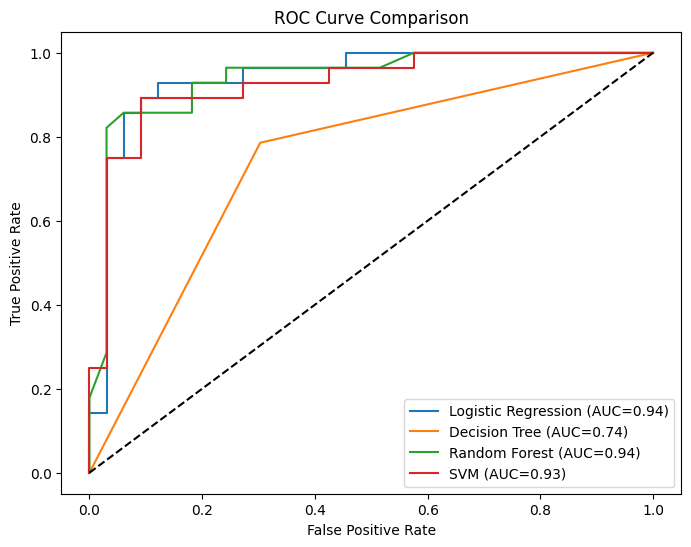


Results of the model evaluations:
                     Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression  0.885246   0.889900  0.885246  0.885431  0.941558
Decision Tree        0.737705   0.744630  0.737705  0.737987  0.741342
Random Forest        0.868852   0.876625  0.868852  0.868993  0.939394
SVM                  0.901639   0.901639  0.901639  0.901639  0.926407


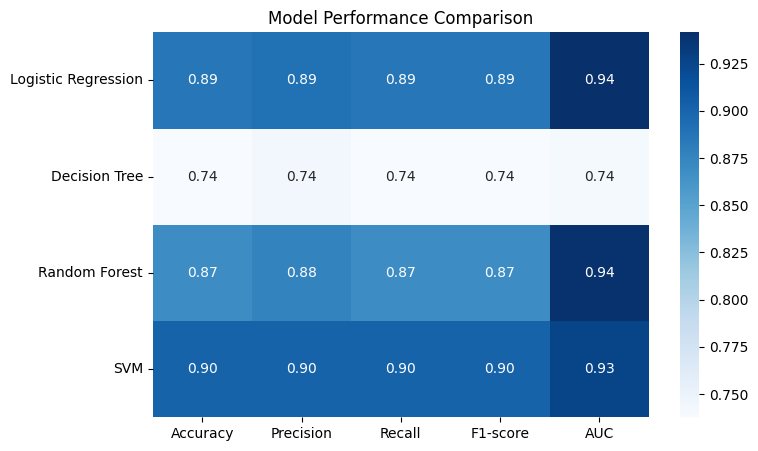

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42)
}

results = {}

plt.figure(figsize=(8,6))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc_score = roc_auc_score(y_test, y_proba[:,1])  

    results[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "AUC": auc_score
    }

    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])  
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc_score:.2f})")

plt.plot([0,1], [0,1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

results_df = pd.DataFrame(results).T
print("\nResults of the model evaluations:")
print(results_df)

plt.figure(figsize=(8,5))
sns.heatmap(results_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("Model Performance Comparison")
plt.show()
